#  OLI data in fall, 2011（transaction）

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
# global configuration: show every rows and cols
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',None)
pd.set_option('display.max_columns', None)

# 1. Data Description
## 1.1 Column Description

In [2]:
# help_table1: the description for data by transactions
df1 = pd.read_csv('OLI_data/help_table1.csv',sep=',',encoding="gbk")
df1 = df1.loc[:, ['Field', 'Annotation']]
df1

,Field,Annotation
0,Row,A row counter
1,Sample Name,"The sample that contains the transaction. If a transaction appears in multiple samples, the transaction will be repeated, but with a different sample name."
2,Transaction Id,A unique ID that identifies the transaction. Currently used for annotating transactions with custom fields via web services.
3,Anon Student Id,"DataShop-generated anonymous student ID. To obtain original student identifiers or to learn more about data anonymization, see About data anonymization below."
4,Session Id,A dataset-unique string that identifies the user's session with the tutor.
5,Time,"Time the transaction occurred. For instance, if a student types ""25"" and presses return, the transaction time is at the point in which they press return."
6,Time Zone,"The local time zone (e.g., EST, PST, US/Eastern)."
7,Duration (sec),"Duration of the transaction in seconds. This is the time of the current transaction minus that of the preceding transaction or problem start event—whichever is closer in time to the current transaction. If this difference is greater than 10 minutes, or if the prior transaction occurred during a different user session, DataShop reports the duration as null (a dot). If the current transaction is preceded by neither another transaction or a problem start event, duration is shown as null. The duration is formatted without decimal places if the two times used in the calculation were without millisecond precision."
8,Student Response Type,"The type of attempt made by the student (e.g., ""ATTEMPT"" or ""HINT_REQUEST""). This is logged in the semantic_event element."
9,Student Response Subtype,"A more detailed classification of the student attempt. For example, the CTAT software describes actions taken by the tutor on behalf of the student as having subtype ""tutor-performed""."


## 1.2 Summarization of Data

**This table organizes the data as student-problem-step-transaction**

In [3]:
df_transaction =  pd.read_csv('OLI_data/AllData_transaction_2011F.csv',low_memory=False) # sep="\t"
df_transaction.head(5)

,Row,Sample Name,Transaction Id,Anon Student Id,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,Tutor Response Type,Tutor Response Subtype,Level (Sequence),Level (Unit),Level (Module),Level (Section1),Problem Name,Problem View,Problem Start Time,Step Name,Attempt At Step,Is Last Attempt,Outcome,Selection,Action,Input,Input.1,Feedback Text,Feedback Classification,Help Level,Total Num Hints,KC (Single-KC),KC Category (Single-KC),KC (Unique-step),KC Category (Unique-step),KC (F2011),KC Category (F2011),KC (F2011).1,KC Category (F2011).1,KC (F2011).2,KC Category (F2011).2,School,Class,CF (oli:activityGuid),CF (oli:highStakes),CF (oli:purpose),CF (oli:resourceType)
0,1,All Data,2adbe4abefd649d48862d3f62b1abf5e,Stu_00b2b35fd027e7891e8a1a527125dd65,8dd109e680020ca6016f8e64290b5610,2011-09-21 17:26:36,US/Eastern,1,VIEW_PAGE,UI Event,NaN,NaN,Statics,Concentrated Forces and Their Effects,Introduction to Free Body Diagrams,NaN,_m2_assess,1,2011-09-21 17:26:35,NaN,NaN,NaN,NaN,Navigation,SelectPageNumber,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marion Technical College,MET2010B-01,NaN,NaN,NaN,NaN
1,2,All Data,4393251e32a6f00502f3f1ef894af8fe,Stu_00b2b35fd027e7891e8a1a527125dd65,8dd109e680020ca6016f8e64290b5610,2011-09-21 17:35:28,US/Eastern,23.13,ATTEMPT,NaN,RESULT,NaN,Statics,Concentrated Forces and Their Effects,Introduction to Free Body Diagrams,NaN,_m2_assess,1,2011-09-21 17:26:35,q1_point1i1 UpdateComboBox,1.0,1.0,CORRECT,q1_point1i1,UpdateComboBox,<material>cord c</material>,NaN,NaN,NaN,NaN,NaN,Single-KC,NaN,NaN,NaN,identify_interaction,NaN,NaN,NaN,NaN,NaN,Marion Technical College,MET2010B-01,NaN,NaN,NaN,NaN
2,3,All Data,e2fb2cb788d10ebaa6f288e0757d1b09,Stu_00b2b35fd027e7891e8a1a527125dd65,8dd109e680020ca6016f8e64290b5610,2011-09-21 17:35:28,US/Eastern,23.13,ATTEMPT,NaN,RESULT,NaN,Statics,Concentrated Forces and Their Effects,Introduction to Free Body Diagrams,NaN,_m2_assess,1,2011-09-21 17:26:35,q1_point3i3 UpdateComboBox,1.0,1.0,CORRECT,q1_point3i3,UpdateComboBox,<material>120 lb</material>,NaN,NaN,NaN,NaN,NaN,Single-KC,NaN,NaN,NaN,gravitational_forces,NaN,NaN,NaN,NaN,NaN,Marion Technical College,MET2010B-01,NaN,NaN,NaN,NaN
3,4,All Data,e7e150d423862e346dc7e36a95e394e4,Stu_00b2b35fd027e7891e8a1a527125dd65,8dd109e680020ca6016f8e64290b5610,2011-09-21 17:35:28,US/Eastern,23.13,ATTEMPT,NaN,RESULT,NaN,Statics,Concentrated Forces and Their Effects,Introduction to Free Body Diagrams,NaN,_m2_assess,1,2011-09-21 17:26:35,q1_point6i2 UpdateComboBox,1.0,1.0,INCORRECT,q1_point6i2,UpdateComboBox,<material>no interaction</material>,NaN,NaN,NaN,NaN,NaN,Single-KC,NaN,NaN,NaN,represent_interaction_spring,NaN,NaN,NaN,NaN,NaN,Marion Technical College,MET2010B-01,NaN,NaN,NaN,NaN
4,5,All Data,684b1f770a225f21745c6c4c977ddc32,Stu_00b2b35fd027e7891e8a1a527125dd65,8dd109e680020ca6016f8e64290b5610,2011-09-21 17:35:28,US/Eastern,23.13,ATTEMPT,NaN,RESULT,NaN,Statics,Concentrated Forces and Their Effects,Introduction to Free Body Diagrams,NaN,_m2_assess,1,2011-09-21 17:26:35,q1_point1i2 UpdateComboBox,1.0,1.0,CORRECT,q1_point1i2,UpdateComboBox,<material>up</material>,NaN,NaN,NaN,NaN,NaN,Single-KC,NaN,NaN,NaN,represent_interaction_cord,NaN,NaN,NaN,NaN,NaN,Marion Technical College,MET2010B-01,NaN,NaN,NaN,NaN


# 2. Data Analysis

In [4]:
df_transaction.describe()

,Row,Tutor Response Subtype,Problem View,Attempt At Step,Is Last Attempt,Feedback Classification,Help Level,Total Num Hints,KC Category (Single-KC),KC Category (Unique-step),KC Category (F2011),KC Category (F2011).1,KC Category (F2011).2
count,361092.000000,0.0,361092.000000,289858.000000,289858.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,180546.500000,NaN,1.180192,2.382867,0.658678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,104238.426039,NaN,0.907172,9.948941,0.474154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,90273.750000,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,180546.500000,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,270819.250000,NaN,1.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,361092.000000,NaN,32.000000,427.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## （1）Analysis for Null and Unique value of column attributes

In [5]:
def work_col_analysis(df_work):
    num_nonull_toal = df_work.notnull().sum()  # Not Null
    dict_col_1 = {'col_name':num_nonull_toal.index,'num_nonull':num_nonull_toal.values}
    df_work_col_1 = pd.DataFrame(dict_col_1)

    num_null_toal = df_work.isnull().sum()  # Null
    dict_col_2 = {'col_name':num_null_toal.index,'num_null':num_null_toal.values}
    df_work_col_2 = pd.DataFrame(dict_col_2)

    num_unique_toal = df_work.apply(lambda col: len(col.unique()))   # axis=0
    print(type(num_unique_toal))
    dict_col_3 = {'col_name':num_unique_toal.index,'num_unique':num_unique_toal.values}
    df_work_col_3 = pd.DataFrame(dict_col_3)

    df_work_col = pd.merge(df_work_col_1, df_work_col_2, on=['col_name'])
    df_work_col = pd.merge(df_work_col, df_work_col_3, on=['col_name'])
    return df_work_col
print("-------------------num_unique_toal and num_nonull_toal----------------------")
df_result = work_col_analysis(df_transaction)
df_result

-------------------num_unique_toal and num_nonull_toal----------------------
<class 'pandas.core.series.Series'>


,col_name,num_nonull,num_null,num_unique
0,Row,361092,0,361092
1,Sample Name,361092,0,1
2,Transaction Id,361092,0,361092
3,Anon Student Id,361092,0,335
4,Session Id,361092,0,6656
5,Time,361092,0,263172
6,Time Zone,361092,0,1
7,Duration (sec),361092,0,2565
8,Student Response Type,361092,0,5
9,Student Response Subtype,71234,289858,2


## （2）Analysis for Discrete value of column attributes
> Columns with a small number of discrete values may represent very informative, so identify these columns first and analyze them one by one

In [6]:
discrete_cols = []
series = []
cols = list(df_transaction.columns.values)

for col in cols:
    if len(df_transaction[col].unique().tolist()) <= 20 and len(df_transaction[col].unique().tolist()) >= 2:
        discrete_cols.append(col)
        series.append(df_transaction[col].unique().tolist())

for a,b in zip(discrete_cols,series):
    print(a," : ",b)
    print("-"*80)

Student Response Type  :  ['VIEW_PAGE', 'ATTEMPT', 'SAVE_ATTEMPT', 'SUBMIT_ATTEMPT', 'HINT_REQUEST']
--------------------------------------------------------------------------------
Student Response Subtype  :  ['UI Event', nan]
--------------------------------------------------------------------------------
Tutor Response Type  :  [nan, 'RESULT', 'HINT_MSG']
--------------------------------------------------------------------------------
Level (Unit)  :  ['Concentrated Forces and Their Effects', 'Engineering Systems - Single Body Equilibrium', 'Complex Interactions Between Bodies', 'Multiple Body Equilibrium - Frames', 'Multiple Body Equilibrium - Trusses', 'Friction', 'Moments of Inertia']
--------------------------------------------------------------------------------
Level (Module)  :  ['Introduction to Free Body Diagrams', 'Effects of Force', 'Representing Interactions Between Bodies', 'Effects of Multiple Forces', 'Equilibrium Under 2D Concentrated Forces', 'Equilibrium of a Sing

## （3）Data Cleaning 
> **Data Cleaning Suggestions**
> - Redundant columns: Columns that are all NULL or Single value.
> - Others

In [7]:
df_transaction_clear = df_transaction.copy(deep=True) # deep copy

In [8]:
# 直接清除所有”冗余列“
cols = list(df_transaction.columns.values)
drop_cols = []
for col in cols:
    if len(df_transaction_clear[col].unique().tolist()) == 1:
        df_transaction_clear.drop(col,axis =1,inplace=True)
        drop_cols.append(col)

print("the cols num before clear: ",len(df_transaction.columns.to_list()))
print("the cols num after clear:",len(df_transaction_clear.columns.to_list()))
for col in drop_cols:
    print("drop:---",col)

the cols num before clear:  47
the cols num after clear: 35
drop:--- Sample Name
drop:--- Time Zone
drop:--- Tutor Response Subtype
drop:--- Level (Sequence)
drop:--- Feedback Classification
drop:--- Help Level
drop:--- Total Num Hints
drop:--- KC Category (Single-KC)
drop:--- KC Category (Unique-step)
drop:--- KC Category (F2011)
drop:--- KC Category (F2011).1
drop:--- KC Category (F2011).2


In [9]:
df_transaction_clear.head()

,Row,Transaction Id,Anon Student Id,Session Id,Time,Duration (sec),Student Response Type,Student Response Subtype,Tutor Response Type,Level (Unit),Level (Module),Level (Section1),Problem Name,Problem View,Problem Start Time,Step Name,Attempt At Step,Is Last Attempt,Outcome,Selection,Action,Input,Input.1,Feedback Text,KC (Single-KC),KC (Unique-step),KC (F2011),KC (F2011).1,KC (F2011).2,School,Class,CF (oli:activityGuid),CF (oli:highStakes),CF (oli:purpose),CF (oli:resourceType)
0,1,2adbe4abefd649d48862d3f62b1abf5e,Stu_00b2b35fd027e7891e8a1a527125dd65,8dd109e680020ca6016f8e64290b5610,2011-09-21 17:26:36,1,VIEW_PAGE,UI Event,NaN,Concentrated Forces and Their Effects,Introduction to Free Body Diagrams,NaN,_m2_assess,1,2011-09-21 17:26:35,NaN,NaN,NaN,NaN,Navigation,SelectPageNumber,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marion Technical College,MET2010B-01,NaN,NaN,NaN,NaN
1,2,4393251e32a6f00502f3f1ef894af8fe,Stu_00b2b35fd027e7891e8a1a527125dd65,8dd109e680020ca6016f8e64290b5610,2011-09-21 17:35:28,23.13,ATTEMPT,NaN,RESULT,Concentrated Forces and Their Effects,Introduction to Free Body Diagrams,NaN,_m2_assess,1,2011-09-21 17:26:35,q1_point1i1 UpdateComboBox,1.0,1.0,CORRECT,q1_point1i1,UpdateComboBox,<material>cord c</material>,NaN,NaN,Single-KC,NaN,identify_interaction,NaN,NaN,Marion Technical College,MET2010B-01,NaN,NaN,NaN,NaN
2,3,e2fb2cb788d10ebaa6f288e0757d1b09,Stu_00b2b35fd027e7891e8a1a527125dd65,8dd109e680020ca6016f8e64290b5610,2011-09-21 17:35:28,23.13,ATTEMPT,NaN,RESULT,Concentrated Forces and Their Effects,Introduction to Free Body Diagrams,NaN,_m2_assess,1,2011-09-21 17:26:35,q1_point3i3 UpdateComboBox,1.0,1.0,CORRECT,q1_point3i3,UpdateComboBox,<material>120 lb</material>,NaN,NaN,Single-KC,NaN,gravitational_forces,NaN,NaN,Marion Technical College,MET2010B-01,NaN,NaN,NaN,NaN
3,4,e7e150d423862e346dc7e36a95e394e4,Stu_00b2b35fd027e7891e8a1a527125dd65,8dd109e680020ca6016f8e64290b5610,2011-09-21 17:35:28,23.13,ATTEMPT,NaN,RESULT,Concentrated Forces and Their Effects,Introduction to Free Body Diagrams,NaN,_m2_assess,1,2011-09-21 17:26:35,q1_point6i2 UpdateComboBox,1.0,1.0,INCORRECT,q1_point6i2,UpdateComboBox,<material>no interaction</material>,NaN,NaN,Single-KC,NaN,represent_interaction_spring,NaN,NaN,Marion Technical College,MET2010B-01,NaN,NaN,NaN,NaN
4,5,684b1f770a225f21745c6c4c977ddc32,Stu_00b2b35fd027e7891e8a1a527125dd65,8dd109e680020ca6016f8e64290b5610,2011-09-21 17:35:28,23.13,ATTEMPT,NaN,RESULT,Concentrated Forces and Their Effects,Introduction to Free Body Diagrams,NaN,_m2_assess,1,2011-09-21 17:26:35,q1_point1i2 UpdateComboBox,1.0,1.0,CORRECT,q1_point1i2,UpdateComboBox,<material>up</material>,NaN,NaN,Single-KC,NaN,represent_interaction_cord,NaN,NaN,Marion Technical College,MET2010B-01,NaN,NaN,NaN,NaN


In [10]:
# the remaining columns
print("-------------------num_unique_toal and num_nonull_toal----------------------")
df_result = work_col_analysis(df_transaction_clear)
df_result

-------------------num_unique_toal and num_nonull_toal----------------------
<class 'pandas.core.series.Series'>


,col_name,num_nonull,num_null,num_unique
0,Row,361092,0,361092
1,Transaction Id,361092,0,361092
2,Anon Student Id,361092,0,335
3,Session Id,361092,0,6656
4,Time,361092,0,263172
5,Duration (sec),361092,0,2565
6,Student Response Type,361092,0,5
7,Student Response Subtype,71234,289858,2
8,Tutor Response Type,289858,71234,3
9,Level (Unit),361092,0,7


### Outlier Analysis
> - <p>It is found that there is a non-numeric type in duration that is '.' , which should represent 0</p>

In [11]:
# Change . to 0 in "duration"
rectify_cols = ['Duration (sec)']
for col in rectify_cols:
    df_transaction_clear[col] = df_transaction_clear[col].apply(lambda x: 0 if x=='.' else x)
    df_transaction_clear[col] = df_transaction_clear[col].astype(float)
print(df_transaction_clear[rectify_cols].dtypes)

Duration (sec)    float64
dtype: object


# 3. Data Visualization

In [12]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [13]:
# Histogram of discrete values
def show_value_counts_bar(colname, sort = True):
    ds = df_transaction[colname].value_counts().reset_index()
    ds.columns = [
        colname,
        'Count'
    ]
    if sort:
        ds = ds.sort_values(by='Count', ascending=False)
    # histogram
    fig = px.bar(
        ds,
        x = colname,
        y = 'Count',
        title = colname + ' distribution'
    )
    fig.show("svg")


# Pie of discrete values
def show_value_counts_pie(colname, sort = True):
    ds = df_transaction[colname].value_counts().reset_index()
    ds.columns = [
        colname,
        'percent'
    ]
    ds['percent'] /= len(df_transaction)
    if sort:
        ds = ds.sort_values(by='percent', ascending=False)
    fig = px.pie(
        ds,
        names = colname,
        values = 'percent',
        title = colname+ ' Percentage',
    )
    fig.show("svg")

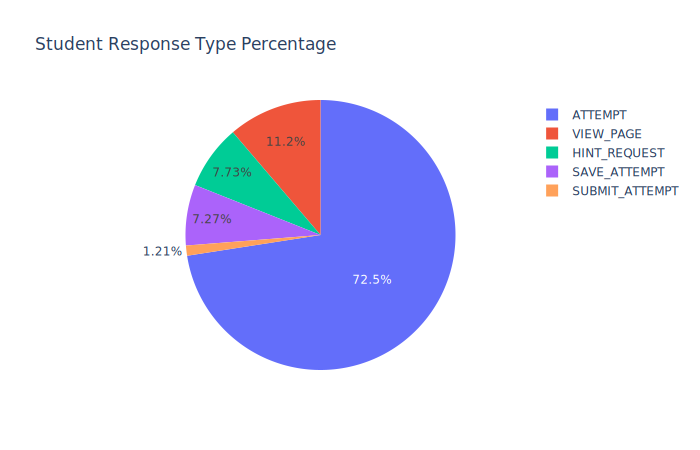

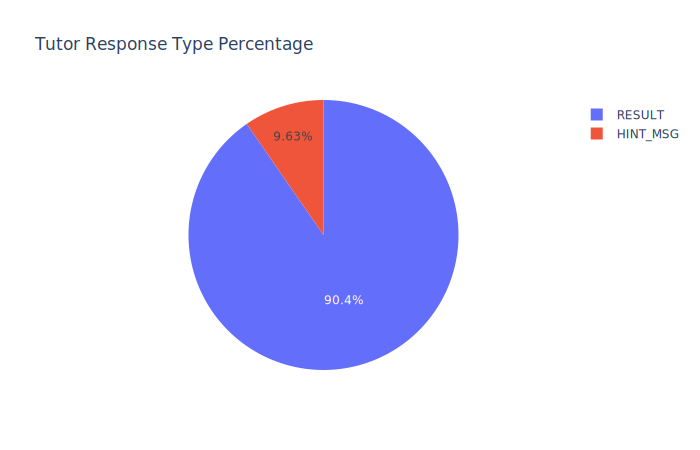

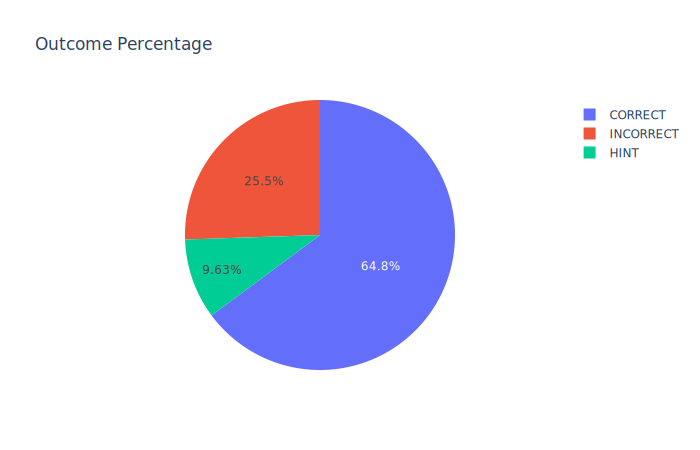

In [14]:
col_pies = ['Student Response Type','Tutor Response Type','Outcome']
for col in col_pies:
    show_value_counts_pie(col)

**Analysis by label description:**
> - If the Student Response Type == ATTEMPT, then the Tutor Response Type == Result, then the Student Response Type => correct or incorrect

> - If the Student Response Type == HINT_REQUEST, then the Tutor Response Type == HINT_MSG, then the outCome => hint

> - If Student Response Type == other,then the Tutor Response Type == NaN, then the outCome => NaN

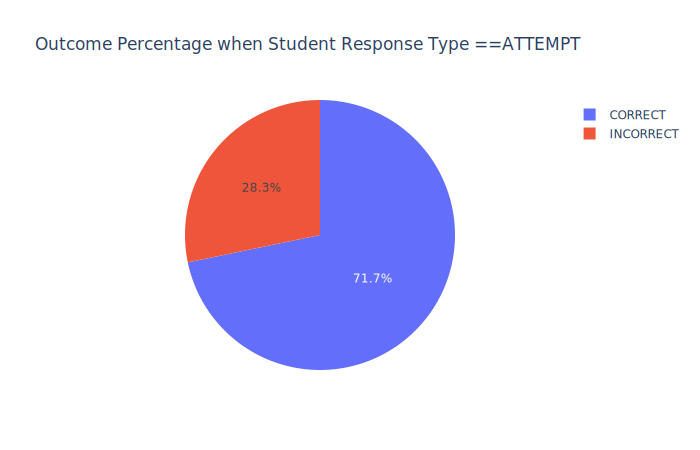

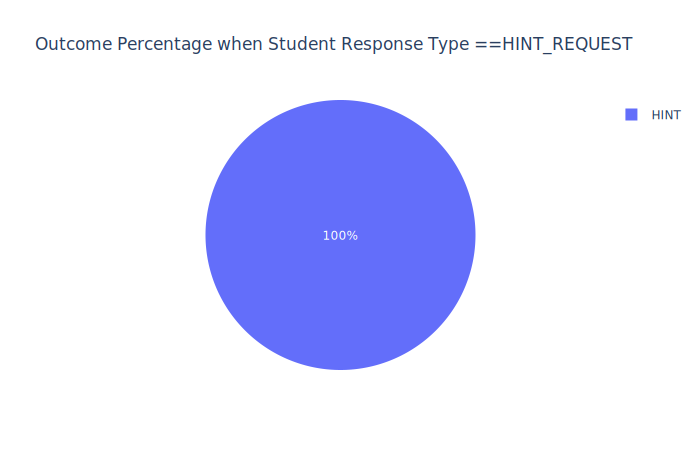

In [15]:
%matplotlib inline
def show_value_counts_pie2(col1,type1,col2, sort = True):
    df_tmp = df_transaction[df_transaction[col1] == type1]
    ds = df_tmp[col2].value_counts().reset_index()
    ds.columns = [
        col2,
        'percent'
    ]
    ds['percent'] /= len(df_tmp)
    if sort:
        ds = ds.sort_values(by='percent', ascending=False)
    fig = px.pie(
        ds,
        names = col2,
        values = 'percent',
        title = col2+ ' Percentage when ' + col1 + ' =='+ type1,
    )
    fig.show("svg")

# Take Student Response Type as an example
col1 = 'Student Response Type'
col2 = 'Outcome'
# col1 = 'Tutor Response Type'
# col2 = 'Outcome'

show_value_counts_pie2(col1,"ATTEMPT",col2)
show_value_counts_pie2(col1,"HINT_REQUEST",col2)

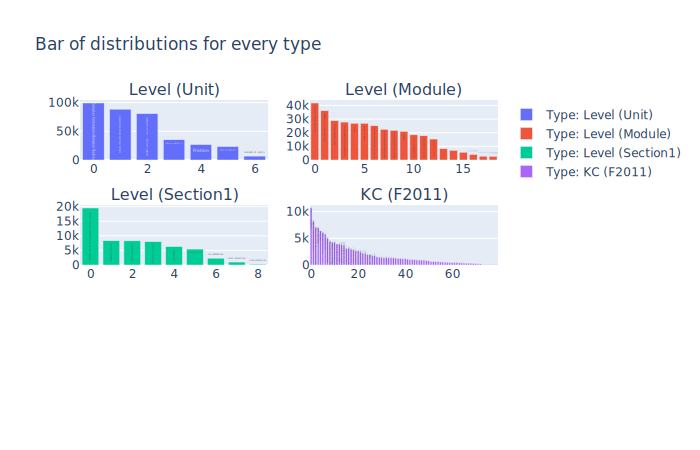

In [16]:
col_bars = ['Level (Unit)','Level (Module)','Level (Section1)','KC (F2011)']

fig = make_subplots(rows=3, cols=2,   # 2*2
      start_cell="top-left",  
      subplot_titles=col_bars,   
      column_widths=[0.5, 0.5]) 
traces = [
    go.Bar(
        x = df_transaction[colname].value_counts().reset_index().index.tolist(),
        y = df_transaction[colname].value_counts().reset_index()[colname].tolist(),
        name = 'Type: ' + str(colname),
        text = df_transaction[colname].value_counts().reset_index()['index'].tolist(),
        textposition = 'auto',
    ) for colname in col_bars
]
for i in range(len(traces)):
    fig.append_trace(
        traces[i],
        (i //2) + 1, # pos_row
        (i % 2) + 1  # pos_col
    )
    
fig.update_layout(
    title_text = 'Bar of distributions for every type',
)

fig.show("svg")


> According to the chart below, there are 3 schools with a smaller sample of students.

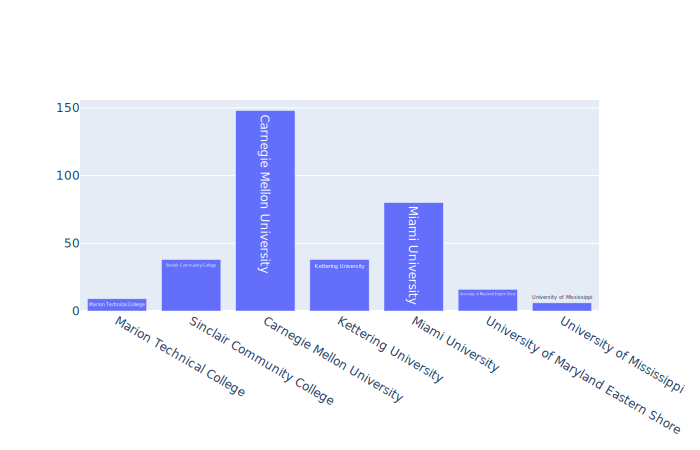

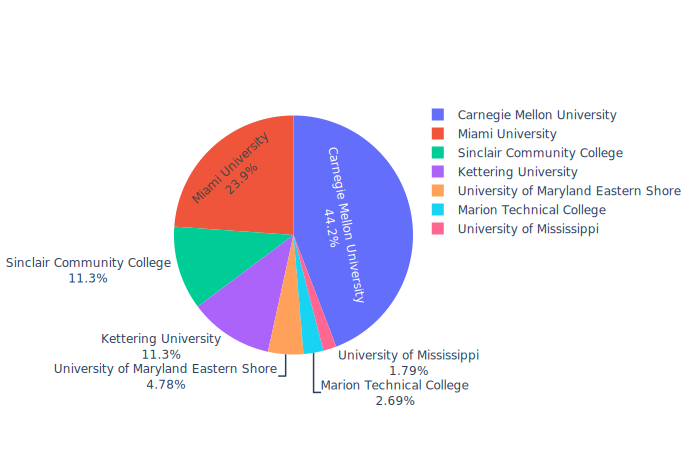

In [17]:
# 按学校统计学生人数
schools = [item for item in df_transaction_clear['School'].unique().tolist()]
students = [len(df_transaction_clear[df_transaction_clear['School'] == sch]['Anon Student Id'].unique()) for sch in schools]
fig = go.Figure(data=[go.Bar(
        x = schools,
        y = students,
        name = 'The number of students is counted by school',
        text = schools,
        textposition = 'auto',
    )])
fig.show("svg")
fig = go.Figure(data=[go.Pie(
        labels = schools,
        values = students,
        name = 'The number of students is counted by school',
        text = schools, 
        textposition = 'auto',
    )])
fig.show("svg")